<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB
code_job
111.0     580.500000
112.0     465.000000
121.0     771.833333
122.0     467.500000
131.0     566.500000
             ...    
992.0     195.789474
999.0      77.789474
1001.0    550.500000
1002.0    453.923077
1009.0    466.500000
Name: income, Length: 150, dtype: float64
결론: 가장 많은 월급을 받는 직업코드는 : 241.0


<Axes: xlabel='code_job', ylabel='mean_income'>

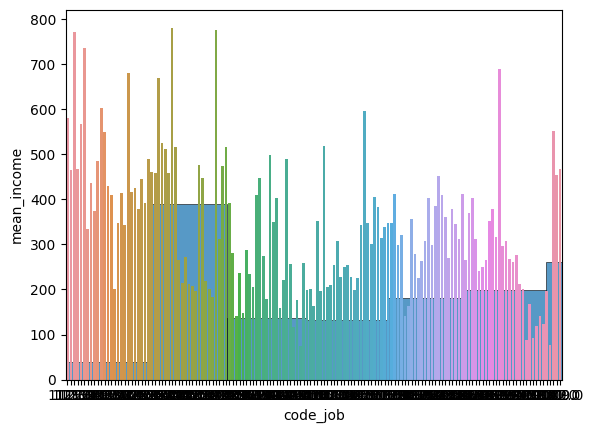

In [1]:
# 작성자: 이성혁
# 5. 어떤 직업이 월급을 가장 많이 받을까?

import pandas as pd
import numpy as np
import seaborn as sns

# 데이터 불러오기
raw_welfare = pd.read_spss('../Koweps_hpwc14_2019_beta2.sav')

# 복수본 만들기
welfare = raw_welfare.copy()

# 데이터 검토하기
welfare # 앞부분, 뒷부분 출력
welfare.shape # 행, 열 개수 출력
welfare.info() # 변수 속성 출력
welfare.describe() # 요약 통계량

welfare = welfare.rename(columns = {
    'h14_g3' : 'sex',
    'h14_g4' : 'birth',
    'h14_g10' : 'marriage_type',
    'h14_g11' : 'religion',
    'p1402_8aq1' : 'income',
    'h14_eco9' : 'code_job',
    'h14_reg7' : 'code_region'
})

# 작업 변수 검토 및 전처리하기
# 1. 직업 변수 검토업 및 전처리하기
welfare['code_job'].dtypes # 변수 타입 출력

# 2. 전처리하기
# 이상치 확인
welfare['code_job'].value_counts() # 빈도수 확인

# 직업별 월급 평균 계산하기 (groupby함수 이용)
job_income_avg = welfare.groupby('code_job')['income'].mean()
# 작업별 월급 평균표 만들기
job_income = welfare.dropna(subset = ['income']).groupby('code_job', as_index = False).agg(mean_income = ('income', 'mean'))
print(job_income_avg)
# 월급이 가장 높은 직업 찾기
highest_income_job = job_income_avg.idxmax()

# 결과 출력
print("결론: 가장 많은 월급을 받는 직업코드는 :", highest_income_job)
# 히스토그램
sns.histplot(data = welfare, x = 'income')
# 막대그래프
sns.barplot(data = job_income, x = 'code_job', y = 'mean_income')